# Signal extraction optimization

Let's see if we can decrease the size of the AIRS-CH0 data by selecting just the pixels that have signal. My idea is to sum across the image and take the ~3 or so rows that give the highest sum.

## Notebook set-up

In [2]:
# Set notebook root to project root
from helper_functions import set_project_root

set_project_root()

# Standard library imports
import pickle
import time

from pathlib import Path

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
import configuration as config

Working directory: /mnt/arkk/kaggle/ariel-data-challenge


## 1. Load test frame

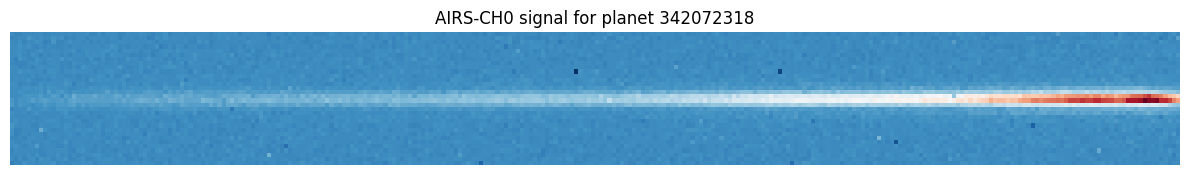

In [4]:
# Get path to this planet's data
planet_path = f'{config.RAW_DATA_DIRECTORY}/train/{config.SAMPLE_PLANET}'

airs_signal = pd.read_parquet(
    f'{planet_path}/AIRS-CH0_signal_0.parquet'
).to_numpy().reshape(11250, 32, 356)[:, :, 39:321]


# Plot the first frame
frame = airs_signal[0]
frame = frame.astype(float) / np.mean(frame.astype(float))

plt.figure(figsize=(12, 2))
plt.title(f'AIRS-CH0 signal for planet {config.SAMPLE_PLANET}')
plt.imshow(frame, cmap='RdBu_r')
plt.axis('off')
plt.tight_layout()